# Problem Statement: Car Price Prediction
The problem focuses on predicting the price of used cars. For example, if a person wants to sell a car, a company with access to the entire dataset should be able to predict the car price based on various features.

The dataset comprises used cars sold on car.com in India, along with important features of these cars. If a user can predict the price of a car based on input features, the prediction result can be used to provide new sellers with price suggestions based on current market conditions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [2]:
df = pd.read_csv('cardekho_imputated.csv')

In [3]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [4]:
# Data Cleaning and Preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [7]:
# Check for missing values
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [8]:
# Categorical features 

cat_feature = [item for item in df.columns if df[item].dtype == 'O']

num_feature = [item for item in df.columns if df[item].dtype != 'O']

In [9]:
df[num_feature].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


In [10]:
# Create an function that gives list of festures that have correlation more than 0.7
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [11]:
correlation(df[num_feature], 0.7)

{'max_power', 'selling_price'}

In [12]:
# The max_power has high correlation with engine and we can drop that feature
df.drop(columns=['max_power'], inplace=True)

In [13]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,5,570000


In [14]:
# drop car name and brand as it is not useful for prediction
df.drop(columns=['car_name', 'brand'], inplace=True)

In [15]:
df.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,5,570000


In [16]:
# Split the data into X and y
X = df.drop(columns=['selling_price'])
y = df['selling_price']

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X['model'] = le.fit_transform(X['model'])

In [18]:
X.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,seats
0,7,9,120000,Individual,Petrol,Manual,19.70,796,5
1,54,5,20000,Individual,Petrol,Manual,18.90,1197,5
2,118,11,60000,Individual,Petrol,Manual,17.00,1197,5
3,7,9,37000,Individual,Petrol,Manual,20.92,998,5
4,38,6,30000,Dealer,Diesel,Manual,22.77,1498,5


In [19]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Categorical features encoding and scaling numerical features
Cat_features = X.select_dtypes(include=['object']).columns
Num_features = X.select_dtypes(exclude=['object']).columns

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), Num_features),
        ('cat', OneHotEncoder(drop='first'), Cat_features)
    ]
)

In [22]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [27]:
# Model Building using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    "RandomForestRegressor": RandomForestRegressor(max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100),
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "SVR": SVR(),
    "KNeighborsRegressor": KNeighborsRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # model evaluation
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Performance:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2 * 100}")
    print("-" * 30)
    

RandomForestRegressor Performance:
Mean Absolute Error: 105404.14742252199
Mean Squared Error: 61836118557.04797
R^2 Score: 91.78565165380056
------------------------------
LinearRegression Performance:
Mean Absolute Error: 315473.6993857193
Mean Squared Error: 324335593653.2114
R^2 Score: 56.915058553020906
------------------------------
Ridge Performance:
Mean Absolute Error: 315316.15999434167
Mean Squared Error: 324322068417.9304
R^2 Score: 56.91685525366537
------------------------------
Lasso Performance:
Mean Absolute Error: 315469.26460939855
Mean Squared Error: 324334705489.60406
R^2 Score: 56.91517653722544
------------------------------
DecisionTreeRegressor Performance:
Mean Absolute Error: 137312.2148340361
Mean Squared Error: 143317127463.0816
R^2 Score: 80.96166388787292
------------------------------
SVR Performance:
Mean Absolute Error: 417375.77705198183
Mean Squared Error: 803520522324.4456
R^2 Score: -6.740164611137511
------------------------------
KNeighborsRegres

In [26]:
# random forest gives the best performance among all models
# Hyperparameter Tuning for Random Forest Regressor
rf = RandomForestRegressor()
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

best_parameter = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
best_parameter.fit(X_train, y_train)
best_params = best_parameter.best_params_
print("Best Parameters:", best_params)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [28]:
# final model with best parameters
final_model = RandomForestRegressor(**best_params)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Final Model Performance:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2 * 100}")

Final Model Performance:
Mean Absolute Error: 105540.55503025826
Mean Squared Error: 60469515961.10793
R^2 Score: 91.96719199035186


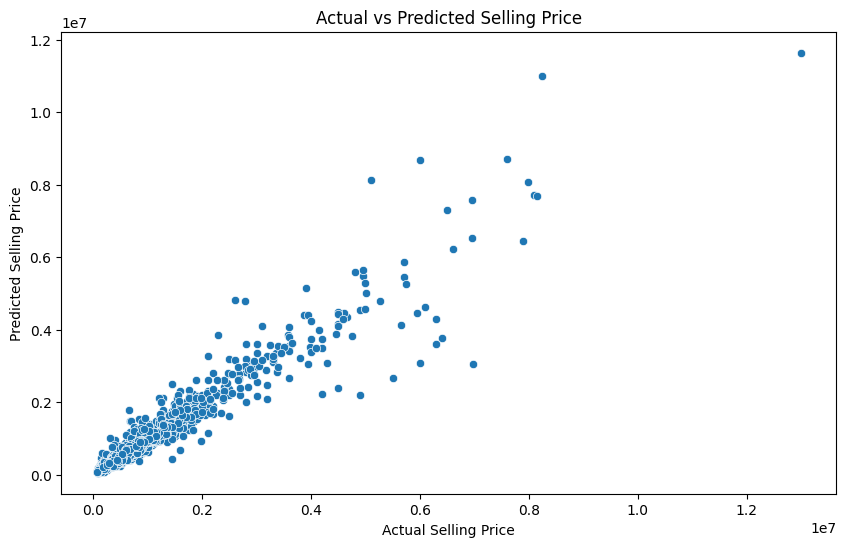

In [33]:
# Visualization of Actual vs Predicted
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.show()